# Ensemble Learning

* In this project, firstly KNN, SVM and Decision Tree applications were performed and how accuracy scores changed according to parameter changes were observed and the results were visualized.

* Then Random Forest, AdaBoost and Voting Classifier algorithms were used to observe their effects on the results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
import warnings
warnings.filterwarnings("ignore")

## Datasets

In [48]:
random_state=42
n_samples=2000
n_features=10
n_classes=2

noise_moon=0.3
noise_circle=0.3
noise_class=0.3

X,y=make_classification(n_samples=n_samples,
                   n_features=n_features,
                   n_classes=n_classes,
                   n_repeated=0,
                   n_redundant=0,
                   n_informative=n_features-1,
                   random_state=random_state,
                    n_clusters_per_class=1,
                   flip_y=noise_class)

<Axes: xlabel='0', ylabel='1'>

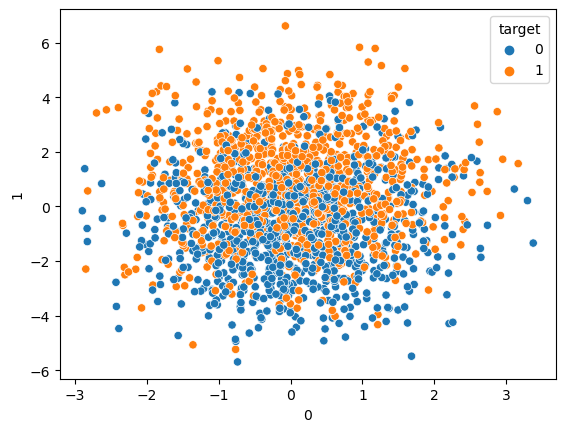

In [49]:
data=pd.DataFrame(X)
data["target"]=y
plt.figure()
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue="target",data=data)

In [50]:
data_classification=(X,y)

In [51]:
moon=make_moons(n_samples=n_samples,noise=noise_moon,random_state=random_state)

<Axes: xlabel='0', ylabel='1'>

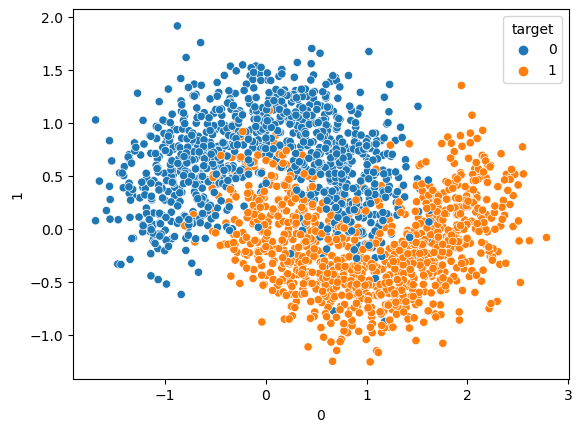

In [52]:
data=pd.DataFrame(moon[0])
data["target"]=moon[1]
plt.figure()
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue="target",data=data)

In [53]:
circle=make_circles(n_samples=n_samples,factor=0.1,noise=noise_circle,random_state=random_state)

<Axes: xlabel='0', ylabel='1'>

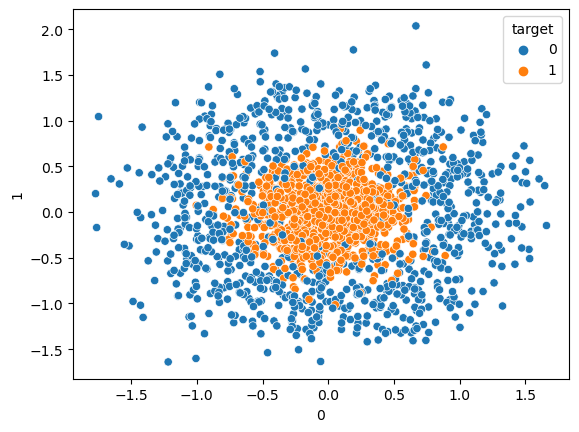

In [54]:
data=pd.DataFrame(circle[0])
data["target"]=circle[1]
plt.figure()
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue="target",data=data)

In [58]:
#KNN, SVM, DT

n_estimators=10

svc=SVC()
knn=KNeighborsClassifier(n_neighbors=15)
dt=DecisionTreeClassifier(random_state=random_state,max_depth=2)

rf=RandomForestClassifier(n_estimators=n_estimators,random_state=random_state,max_depth=2)
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=n_estimators,random_state=random_state)
v1=VotingClassifier(estimators=[('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

names=["SVC","KNN","Decision Tree","Random Forest","AdaBoost","V1"]
classifiers=[svc,knn,dt,rf,ada,v1]
datasets=[moon,circle]

Dataset # 0
SVC: test set score: 0.91375
SVC: train set score: 0.915

KNN: test set score: 0.90375
KNN: train set score: 0.9291666666666667

Decision Tree: test set score: 0.8875
Decision Tree: train set score: 0.9

Random Forest: test set score: 0.8875
Random Forest: train set score: 0.895

AdaBoost: test set score: 0.8825
AdaBoost: train set score: 0.9283333333333333

V1: test set score: 0.91
V1: train set score: 0.92

---------------------------------------------------
Dataset # 1
SVC: test set score: 0.89
SVC: train set score: 0.9116666666666666

KNN: test set score: 0.88375
KNN: train set score: 0.9058333333333334

Decision Tree: test set score: 0.73125
Decision Tree: train set score: 0.7675

Random Forest: test set score: 0.87875
Random Forest: train set score: 0.91

AdaBoost: test set score: 0.88125
AdaBoost: train set score: 0.9133333333333333

V1: test set score: 0.895
V1: train set score: 0.9125

---------------------------------------------------


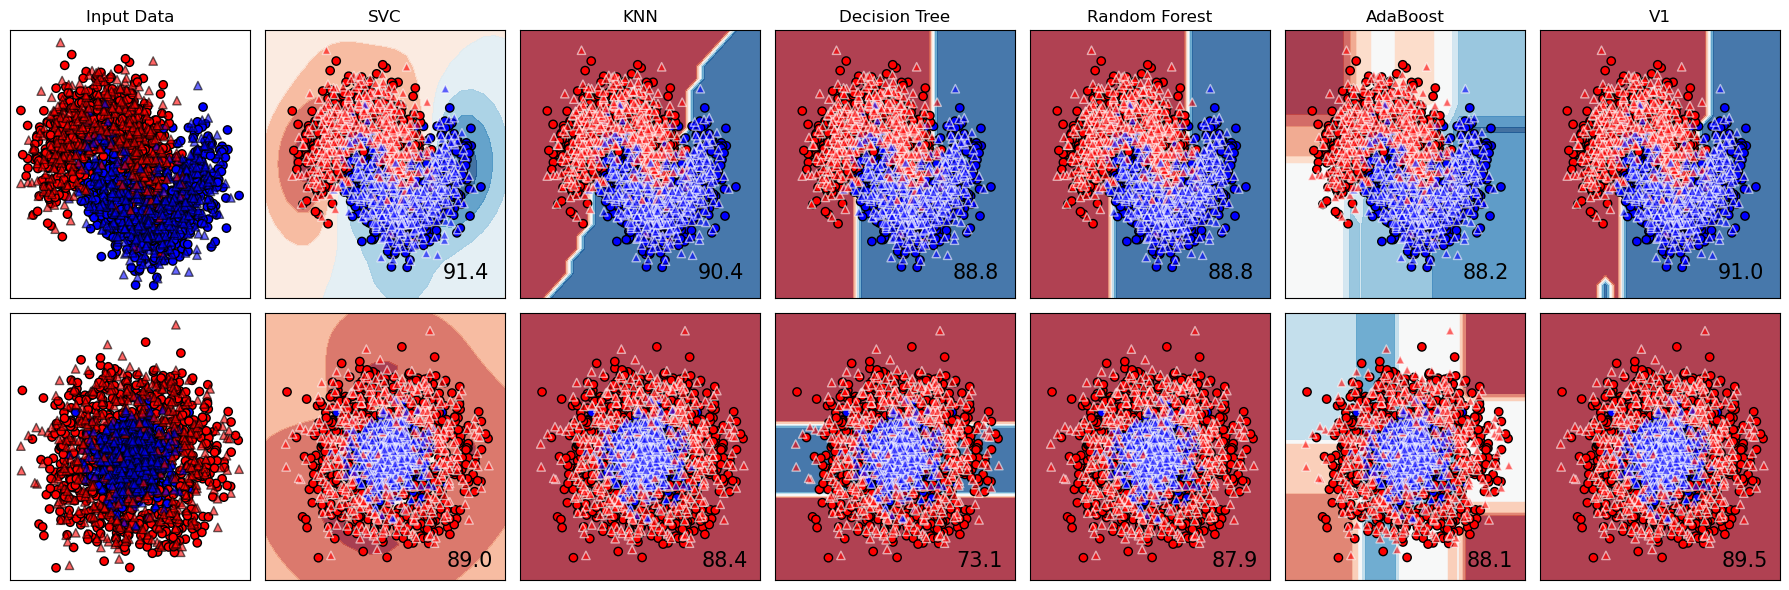

In [59]:
h=.2
i=1
figure=plt.figure(figsize=(18,6))
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.4, random_state=random_state)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm=plt.cm.RdBu
    cm_bright=ListedColormap(['#FF0000','#0000FF'])

    ax=plt.subplot(len(datasets),len(classifiers)+1,i)
    
    if ds_cnt==0:
        ax.set_title("Input Data")
        
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,edgecolors='k')
    #Plot the test points
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,marker='^',edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    
    print("Dataset # {}".format(ds_cnt))
    


    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("---------------------------------------------------")

plt.tight_layout()
plt.show()

In [60]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

print("Dataset # 2")
make_classify(data_classification, classifiers, names)


Dataset # 2
SVC: test set score: 0.83875
SVC: train set score: 0.8666666666666667

KNN: test set score: 0.835
KNN: train set score: 0.8583333333333333

Decision Tree: test set score: 0.77
Decision Tree: train set score: 0.7708333333333334

Random Forest: test set score: 0.7775
Random Forest: train set score: 0.8058333333333333

AdaBoost: test set score: 0.79
AdaBoost: train set score: 0.8416666666666667

V1: test set score: 0.8375
V1: train set score: 0.8575

